In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
data = 'C:/Users/LENOVO/Desktop/Cours_Machine-learning/diabetes.csv'

df = pd.read_csv(data)

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
col_names = df.columns

col_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#on compte le nombre d'occurrence de ma classe outcome 
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
#le pourcentage que ça represente dans les données
df['Outcome'].value_counts() / float(len(df))


Outcome
0    0.651042
1    0.348958
Name: count, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#statistiques des colonnes
round(df.describe(),2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


Text(0, 0.5, 'Outcome')

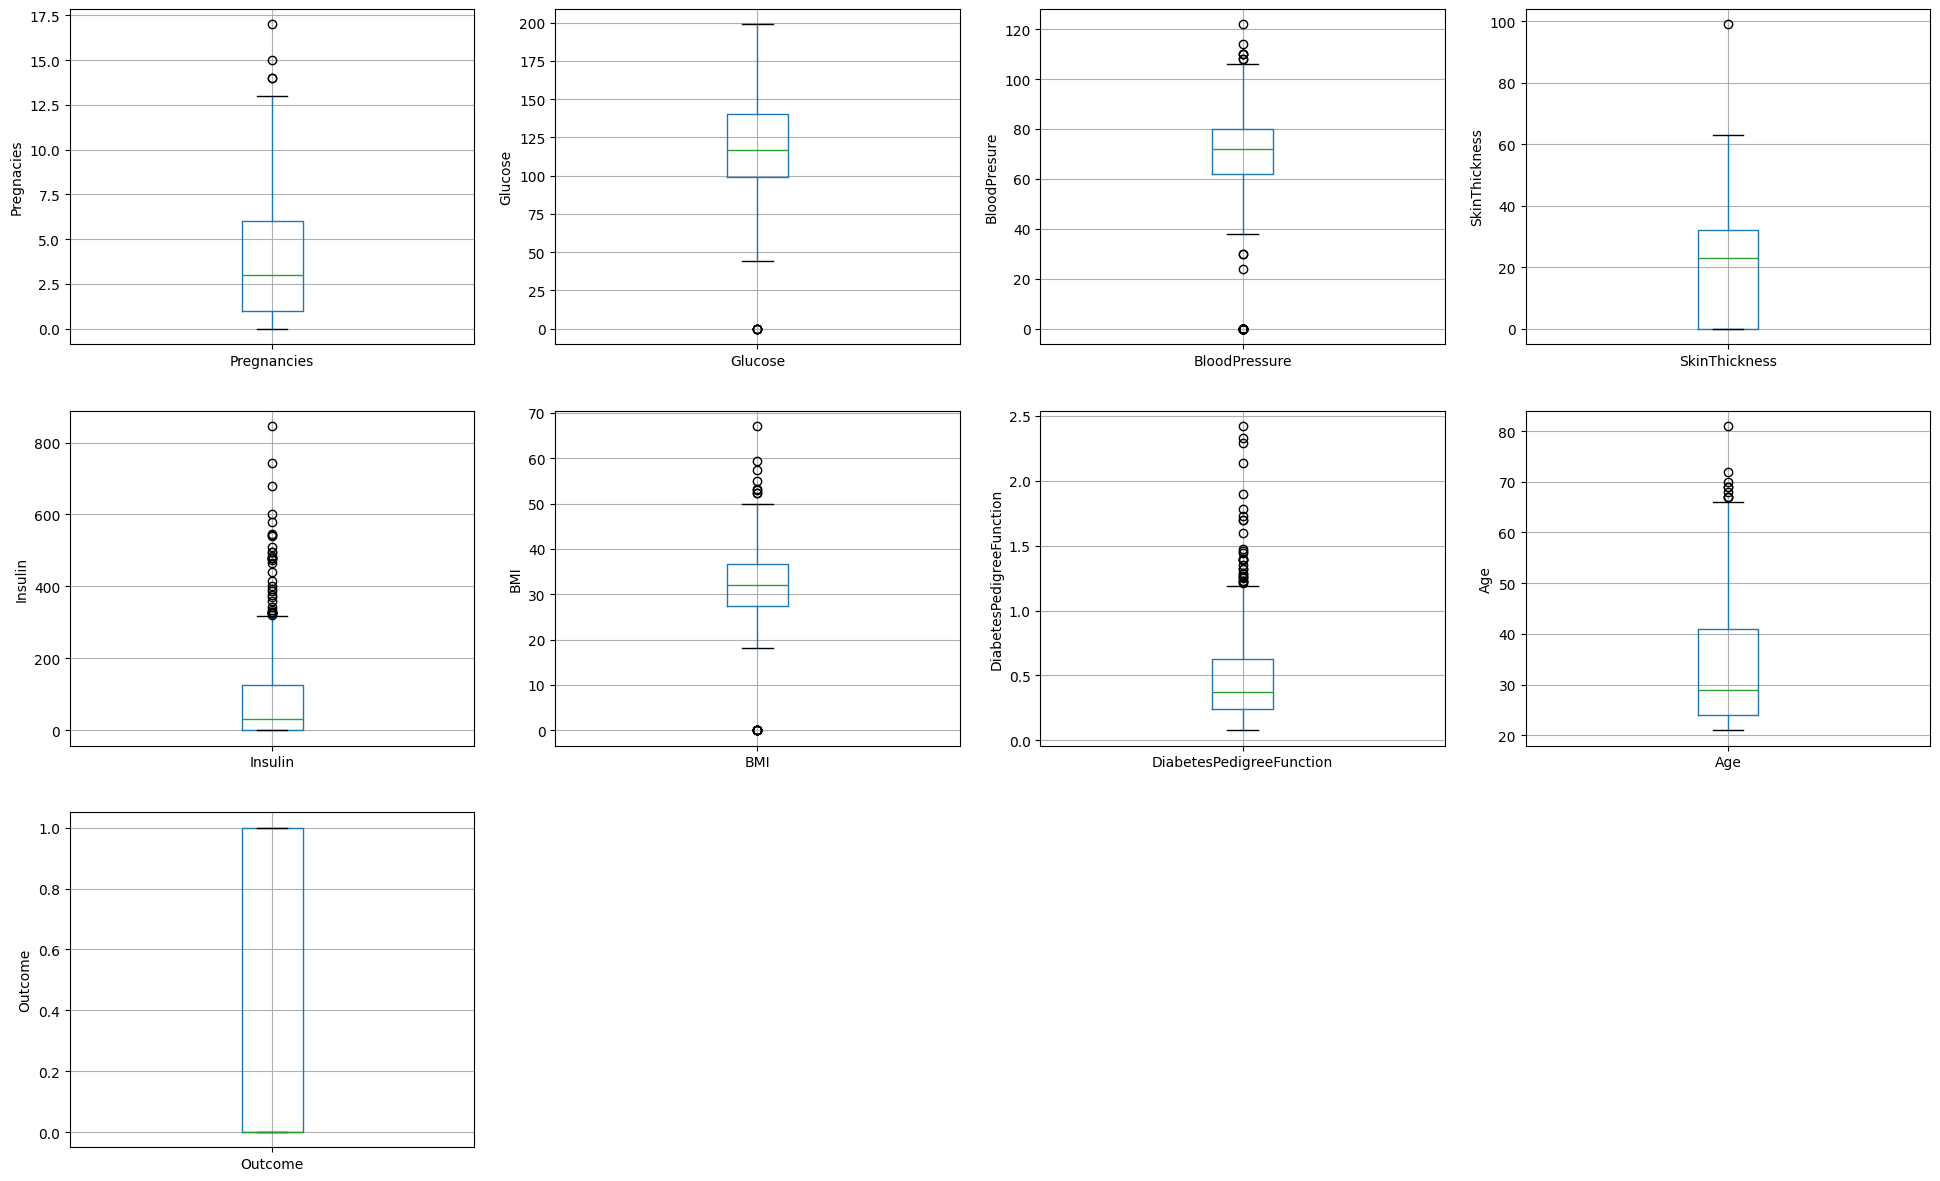

In [14]:
plt.figure(figsize=(24,20))


plt.subplot(4, 4, 1)
fig = df.boxplot(column='Pregnancies')
fig.set_title('')
fig.set_ylabel('Pregnacies')


plt.subplot(4, 4, 2)
fig = df.boxplot(column='Glucose')
fig.set_title('')
fig.set_ylabel('Glucose')


plt.subplot(4, 4, 3)
fig = df.boxplot(column='BloodPressure')
fig.set_title('')
fig.set_ylabel('BloodPresure')

plt.subplot(4, 4, 4)
fig = df.boxplot(column='SkinThickness')
fig.set_title('')
fig.set_ylabel('SkinThickness')



plt.subplot(4, 4, 5)
fig = df.boxplot(column='Insulin')
fig.set_title('')
fig.set_ylabel('Insulin')

plt.subplot(4, 4, 6)
fig = df.boxplot(column='BMI')
fig.set_title('')
fig.set_ylabel('BMI')

plt.subplot(4, 4, 7)
fig = df.boxplot(column='DiabetesPedigreeFunction')
fig.set_title('')
fig.set_ylabel('DiabetesPedigreeFunction')

plt.subplot(4, 4, 8)
fig = df.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

plt.subplot(4, 4, 9)
fig = df.boxplot(column='Outcome')
fig.set_title('')
fig.set_ylabel('Outcome')







In [ ]:
X = df.drop(['Outcome'], axis=1) #variables predictives, supprime outcome du dataframe

y = df['Outcome'] #variables à predire, uniquement outcome dans le dataframe

In [ ]:
from sklearn.model_selection import train_test_split
#on separe les données d'entrainement des données de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #80% de predictions et 20% de test

In [19]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [20]:
cols = X_train.columns

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [23]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [26]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [27]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-2.169817e-17,0.000000,1.157236e-17,5.207561e-17,5.786179e-18,1.735854e-17,1.012581e-17,-2.314471e-17
std,1.000815e+00,1.000815,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.126063e+00,-3.803690,-3.543717e+00,-1.285816e+00,-6.996567e-01,-4.072759e+00,-1.166818e+00,-1.048981e+00
25%,-8.354355e-01,-0.688897,-3.699205e-01,-1.285816e+00,-6.996567e-01,-5.951922e-01,-6.862388e-01,-7.991138e-01
50%,-2.541807e-01,-0.106839,1.419821e-01,1.481486e-01,-3.844838e-01,2.444697e-02,-2.927647e-01,-3.826685e-01
75%,6.177016e-01,0.632531,5.515042e-01,7.560247e-01,4.077076e-01,5.776962e-01,4.205946e-01,6.168003e-01
max,3.814603e+00,2.425896,2.701495e+00,4.886465e+00,6.506730e+00,4.412504e+00,5.867657e+00,3.948363e+00


In [ ]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
#on cree un classificateur SVM
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7922


In [29]:
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.7597


In [30]:
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)

print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.7078


In [37]:
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8247


In [32]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [33]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7638
